In [77]:
import pandas as pd
import numpy as np 
import seaborn as sns
import json


In [78]:
KR=pd.read_csv('KRvideos.csv', encoding='latin')
KR_category=pd.read_json(pd.read_json('KR_category_id.json')['items'].to_json(orient ='values'))
US=pd.read_csv('USvideos.csv', encoding='latin')
US_category=pd.read_json(pd.read_json('US_category_id.json')['items'].to_json(orient ='values'))
JP=pd.read_csv('JPvideos.csv', encoding='latin')
JP_category=pd.read_json(pd.read_json('JP_category_id.json')['items'].to_json(orient ='values'))


In [79]:
KR_category['name']=pd.read_json(KR_category['snippet'].to_json(orient ='values'))['title']
US_category['name']=pd.read_json(US_category['snippet'].to_json(orient ='values'))['title']
JP_category['name']=pd.read_json(JP_category['snippet'].to_json(orient ='values'))['title']

In [80]:
KR_merge = pd.merge(KR, KR_category, how='left', left_on='category_id', right_on='id') 
US_merge = pd.merge(US, US_category, how='left', left_on='category_id', right_on='id') 
JP_merge = pd.merge(JP, JP_category, how='left', left_on='category_id', right_on='id') 

In [81]:
KR_merge=KR_merge.sort_values(by='views', ascending=False)
US_merge=US_merge.sort_values(by='views', ascending=False)
JP_merge=JP_merge.sort_values(by='views', ascending=False)

In [82]:
KR_merge=KR_merge.drop_duplicates(['video_id'])
US_merge=US_merge.drop_duplicates(['video_id'])
JP_merge=JP_merge.drop_duplicates(['video_id'])

In [83]:
KR_merge=pd.DataFrame(KR_merge,columns=['video_id','title','channel_title','views','likes','comment_count','name'])
US_merge=pd.DataFrame(US_merge,columns=['video_id','title','channel_title','views','likes','comment_count','name'])
JP_merge=pd.DataFrame(JP_merge,columns=['video_id','title','channel_title','views','likes','comment_count','name'])

In [84]:
KR_merge=KR_merge.head(10)
US_merge=US_merge.head(10)
JP_merge=JP_merge.head(10)


In [85]:
KR_merge.to_csv('KRn.csv')
US_merge.to_csv('USn.csv')
JP_merge.to_csv('JPn.csv')

In [87]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mean of views')

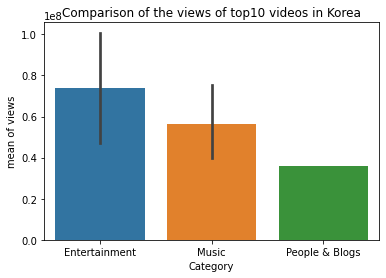

In [92]:
ax1= sns.barplot(x= 'name', y='views', data= KR_merge)
ax1.set_title('Comparison of the views of top10 videos in Korea')
ax1.set_xlabel('Category')
ax1.set_ylabel('mean of views')




Text(0, 0.5, 'mean of views')

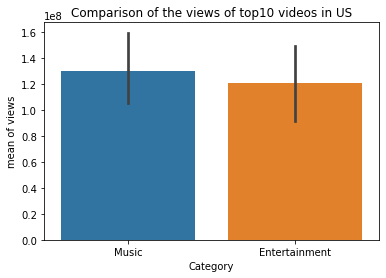

In [93]:
ax2= sns.barplot(x= 'name', y='views', data= US_merge)
ax2.set_title('Comparison of the views of top10 videos in US')
ax2.set_xlabel('Category')
ax2.set_ylabel('mean of views')

Text(0, 0.5, 'mean of views')

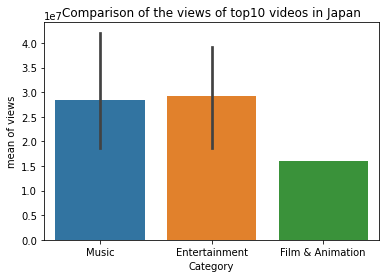

In [94]:
ax3= sns.barplot(x= 'name', y='views', data= JP_merge)
ax3.set_title('Comparison of the views of top10 videos in Japan')
ax3.set_xlabel('Category')
ax3.set_ylabel('mean of views')